<a href="https://colab.research.google.com/github/joowop/Metaverse_AI_Project/blob/main/fsam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1160, done.
remote: Counting objects: 100% (634/634), done.
remote: Compressing objects: 100% (473/473), done.
remote: Total 1160 (delta 172), reused 575 (delta 153), pack-reused 526
Receiving objects: 100% (1160/1160), 72.45 MiB | 40.04 MiB/s, done.
Resolving deltas: 100% (446/446), done.


In [2]:
!pip install -r ./FastSAM/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine

In [3]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-lheb0i9x
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-lheb0i9x
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.6 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=6a01887df8e5f70fccd12fd97b98a360daaa6355f767222de0824ddbdfdba896
  Stored in directory: /tmp/pip-ephem-wheel-cache-kexepb_0/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [4]:
import os
os.mkdir('weights')

In [5]:
os.mkdir('images')

In [6]:
!pwd

/content


In [7]:
os.chdir('images')

In [8]:
!pwd

/content/images


In [9]:
!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

In [10]:
os.chdir('/content/FastSAM')

In [21]:
# from __future__ import annotations
from fastsam import FastSAM, FastSAMPrompt

model = FastSAM('../weights/FastSAM-s.pt')
IMAGE_PATH = '../images/dog.jpeg'
DEVICE = 'cpu'
results = model(IMAGE_PATH, device = DEVICE, retina_masks = True, imgsz = 1024, conf = 0.4, iou = 0.9)
prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)

## 프롬프트 종류
# ann = prompt_process.text_prompt(text='a photo of a bag')
# ann = prompt_process.everything_prompt()
# ann = prompt_process.box_prompt(bbox=[[200,200,230,230]])
ann = prompt_process.point_prompt(points=[[50,50]], pointlabel=[1])

prompt_process.plot(annotations=ann, output_path = './output/dog.jpg')


image 1/1 /content/FastSAM/../images/dog.jpeg: 1024x576 52 objects, 1069.1ms
Speed: 5.0ms preprocess, 1069.1ms inference, 764.5ms postprocess per image at shape (1, 3, 1024, 1024)


In [22]:
ann

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

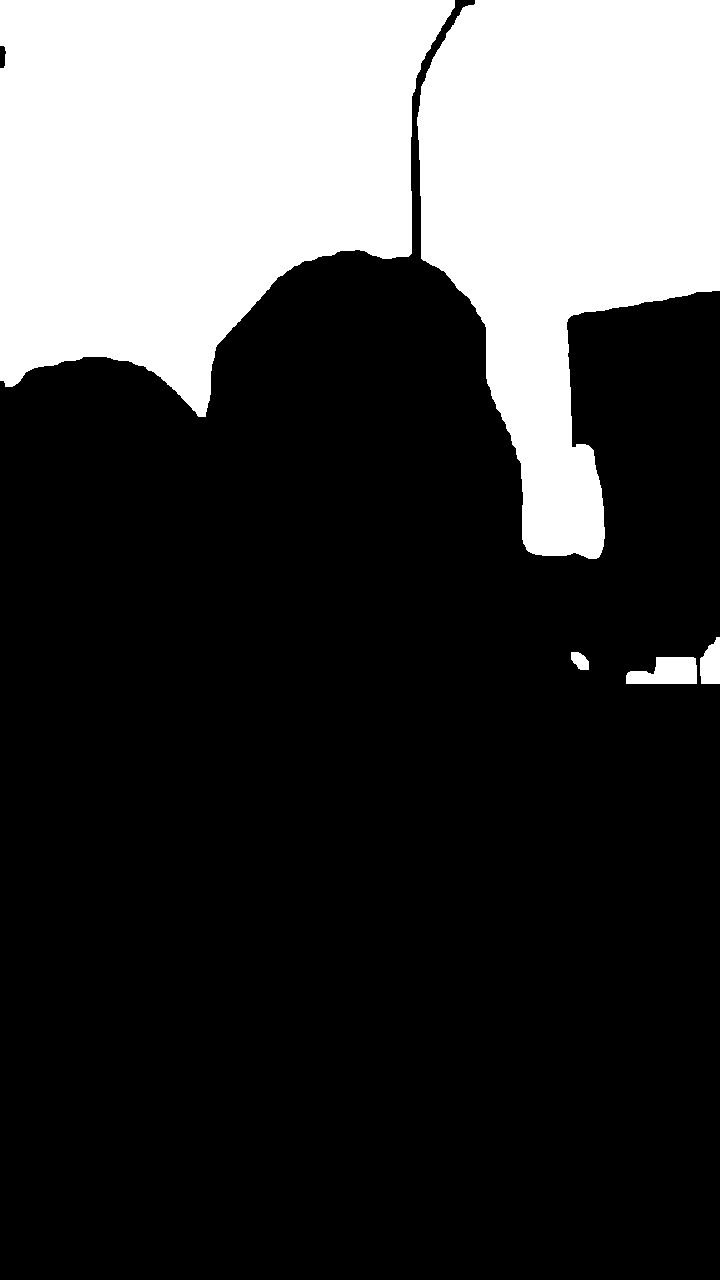

In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
annotations = np.array(ann)
annotations = annotations.reshape(1280,720)
annotations = annotations * 255
cv2_imshow(annotations)